In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

/home/eli/anaconda3/envs/HTFATorch/lib/python3.7/site-packages/hypertools/plot/__init__.py:10: UserWarning: Could not switch backend to TkAgg.  This may impact performance of the plotting functions.
  warnings.warn('Could not switch backend to TkAgg.  This may impact performance of the plotting functions.')


In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018_0.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

10/07/2020 11:34:46 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 11:34:55 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run03_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 11:35:05 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub10_run01_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 11:35:14 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run02_mc_MNI_masked.nii.gz with mask /home/eli/Documents/AffVids/wholebrain2.nii.gz (zscore=True, smooth=6, zscore_by_rest=False)
10/07/2020 11:35:23 Loading Nifti image /home/eli/Documents/AffVids/motion_corrected/sub11_run01_mc_MNI_masked.nii.g

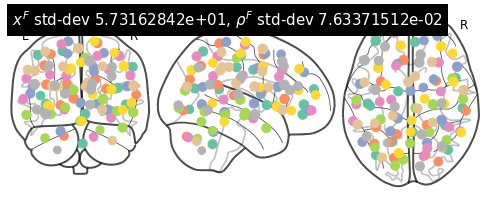

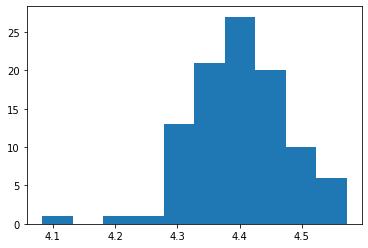

(<nilearn.plotting.displays.OrthoProjector at 0x7f018f297d10>,
 tensor([[-4.1680e+01, -2.2444e+01,  1.0425e+01],
         [ 5.5259e+01, -2.4523e+01,  4.0802e+01],
         [ 3.6804e+01, -4.2929e+01,  1.7583e+01],
         [ 5.2094e+00,  4.4928e+01, -8.7775e+00],
         [-1.2420e+01, -7.0276e+00,  3.8314e+01],
         [-1.8568e+01, -5.9951e+01,  5.7532e+01],
         [ 2.5915e+00, -4.9891e+01, -4.0055e+01],
         [ 3.9980e+01, -6.8537e+01,  1.8607e+01],
         [-3.6067e+01, -7.4187e+01, -3.3993e+00],
         [ 4.8014e+01,  7.0541e+00,  1.1777e+00],
         [-4.4465e+01, -1.9893e+01,  5.3296e+01],
         [-3.5997e+01,  4.6149e+01,  1.5855e+00],
         [-1.3284e+01,  5.6770e+01,  1.7804e+01],
         [ 2.7450e+01,  3.8500e+00,  1.7891e+01],
         [-2.0905e+01, -6.0628e+01,  5.2029e-01],
         [-1.4153e+01, -5.2051e+01,  2.3294e+01],
         [-3.0767e+01,  3.6070e+00,  5.4042e+01],
         [ 2.9728e+01, -8.0952e+01, -4.5481e+00],
         [-3.5582e+01, -4.4495e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.num_blocks

708

In [9]:
dtfa.num_voxels

81638

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-3}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=affvids_db.inference_filter(training=True))

10/07/2020 11:45:14 [Epoch 1] (17222ms) Posterior free-energy 6.30240133e+10 = KL from prior 1.96886180e+07 - log-likelihood -6.30043075e+10
10/07/2020 11:45:14 Saving checkpoint...
10/07/2020 11:45:31 [Epoch 2] (17066ms) Posterior free-energy 6.11424379e+10 = KL from prior 1.09454770e+07 - log-likelihood -6.11314934e+10
10/07/2020 11:45:47 [Epoch 3] (16281ms) Posterior free-energy 5.97144289e+10 = KL from prior 6.26878200e+06 - log-likelihood -5.97081580e+10
10/07/2020 11:46:04 [Epoch 4] (16352ms) Posterior free-energy 5.86613637e+10 = KL from prior 3.42502350e+06 - log-likelihood -5.86579599e+10
10/07/2020 11:46:20 [Epoch 5] (16355ms) Posterior free-energy 5.79358638e+10 = KL from prior 2.11523600e+06 - log-likelihood -5.79337298e+10
10/07/2020 11:46:36 [Epoch 6] (16360ms) Posterior free-energy 5.73853123e+10 = KL from prior 1.50239550e+06 - log-likelihood -5.73838254e+10
10/07/2020 11:46:53 [Epoch 7] (16383ms) Posterior free-energy 5.69732219e+10 = KL from prior 1.22685438e+06 - log

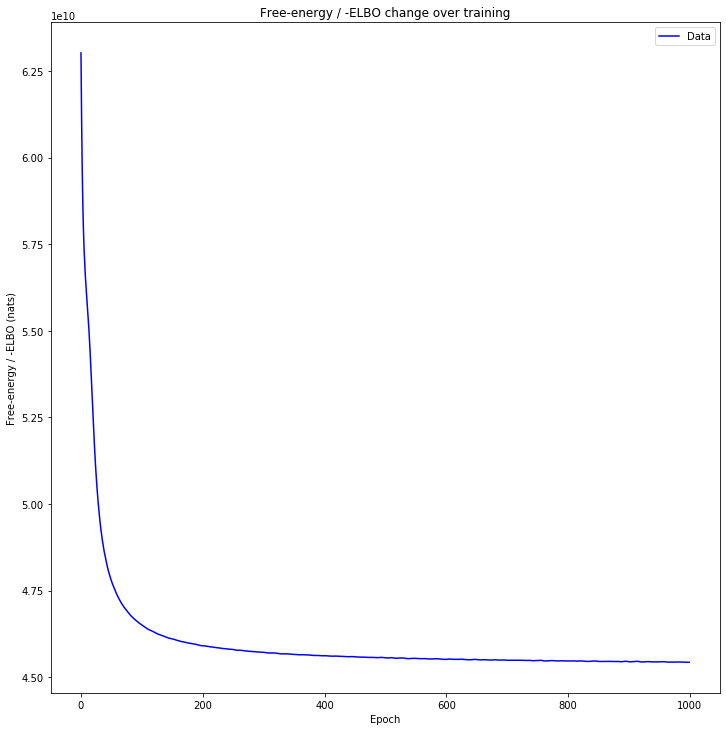

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

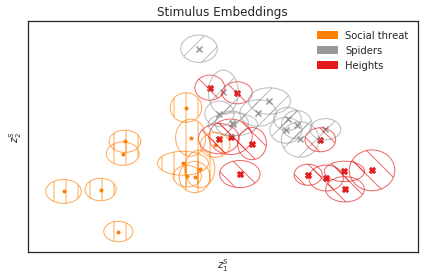

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

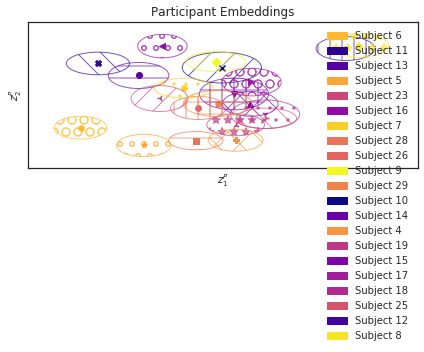

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

10/07/2020 16:20:10 Plotting factors for Participant 12, run 2


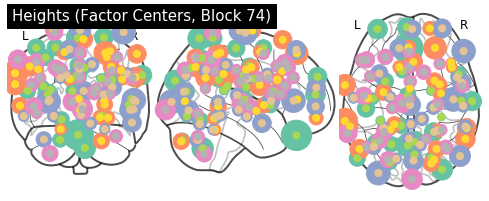

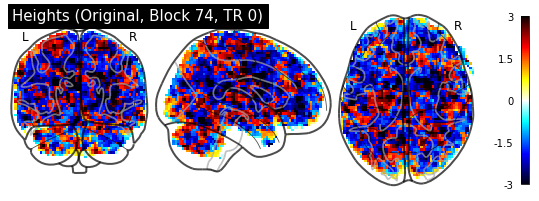

10/07/2020 16:20:14 Reconstruction Error (Frobenius Norm): 1.28520599e+02 out of 1.30408630e+03


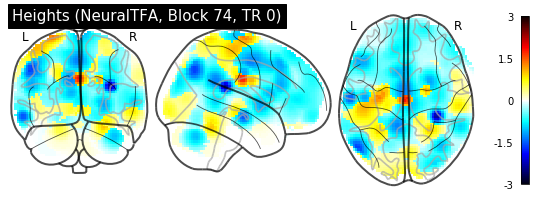

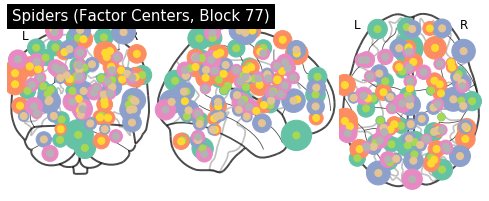

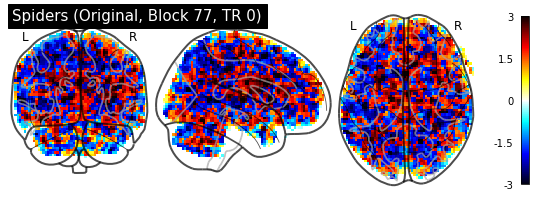

10/07/2020 16:20:19 Reconstruction Error (Frobenius Norm): 1.34380798e+02 out of 1.28555078e+03


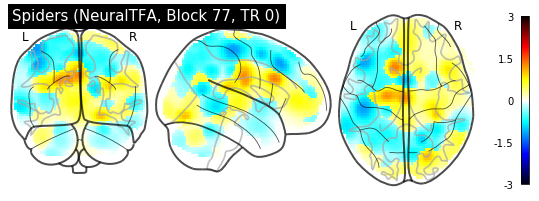

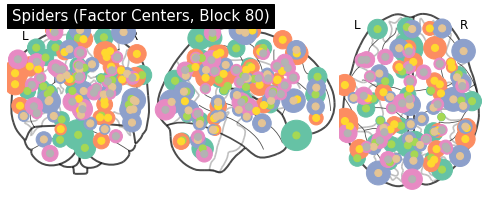

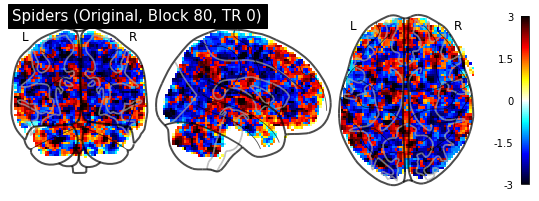

10/07/2020 16:20:23 Reconstruction Error (Frobenius Norm): 1.63427887e+02 out of 1.27551123e+03


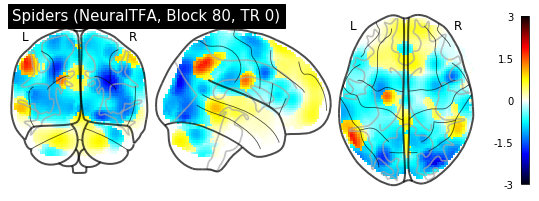

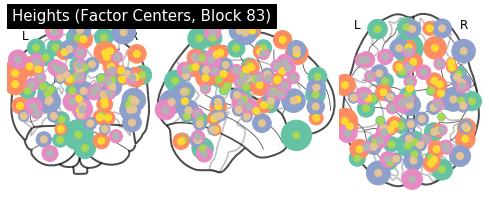

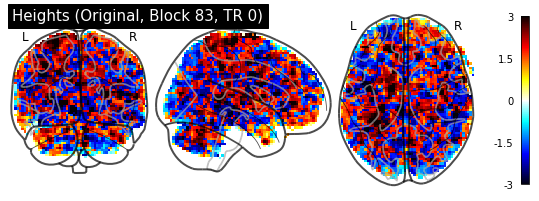

10/07/2020 16:20:28 Reconstruction Error (Frobenius Norm): 1.51500443e+02 out of 1.27717212e+03


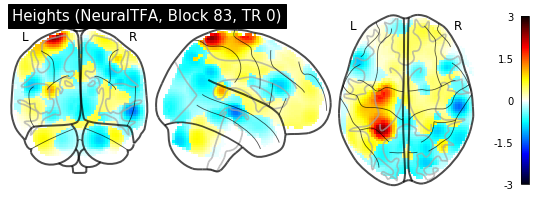

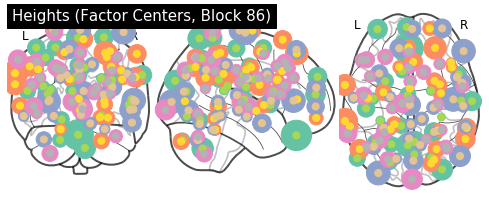

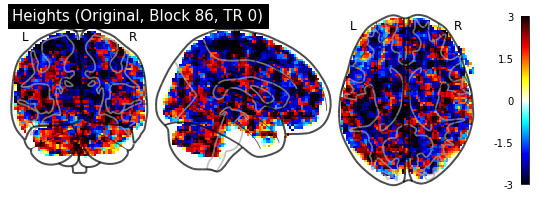

10/07/2020 16:20:32 Reconstruction Error (Frobenius Norm): 1.44402176e+02 out of 1.26335376e+03


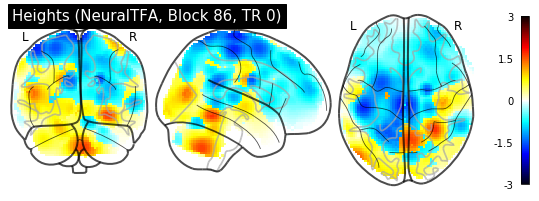

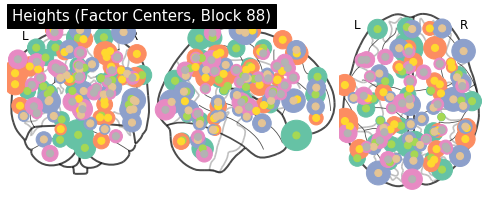

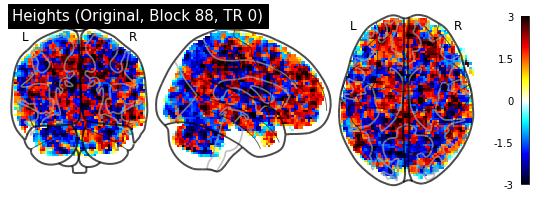

10/07/2020 16:20:37 Reconstruction Error (Frobenius Norm): 1.53713959e+02 out of 1.37598022e+03


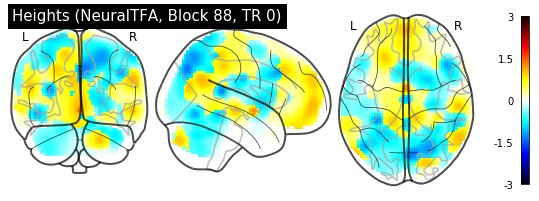

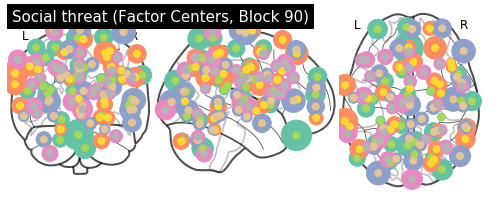

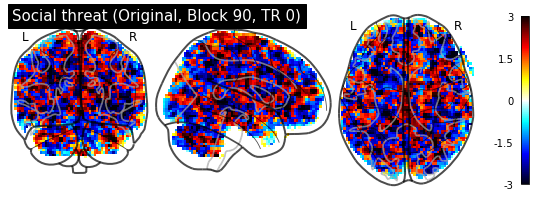

10/07/2020 16:20:42 Reconstruction Error (Frobenius Norm): 1.24450684e+02 out of 1.22991479e+03


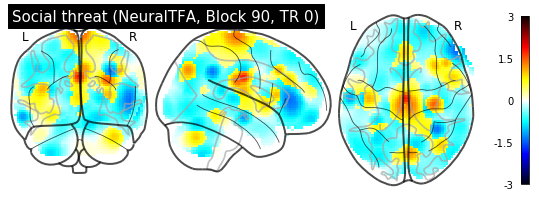

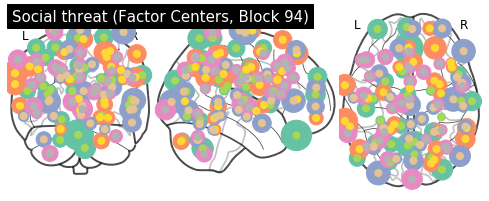

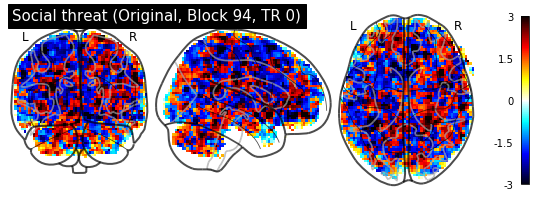

10/07/2020 16:20:46 Reconstruction Error (Frobenius Norm): 1.49430740e+02 out of 1.32249561e+03


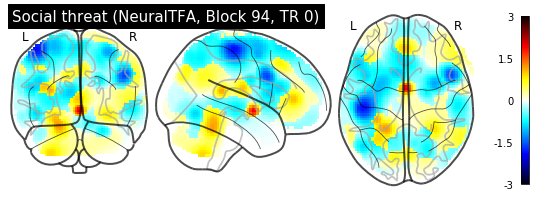

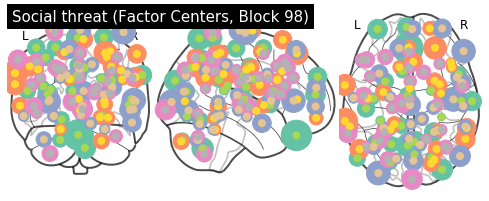

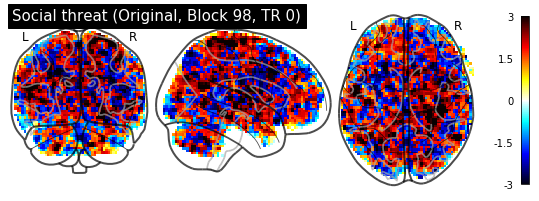

10/07/2020 16:20:51 Reconstruction Error (Frobenius Norm): 1.44482742e+02 out of 1.30590710e+03


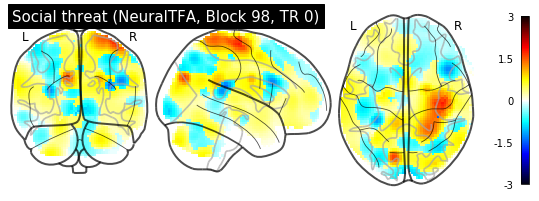

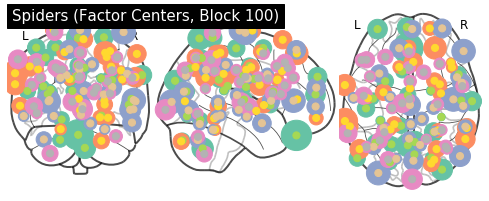

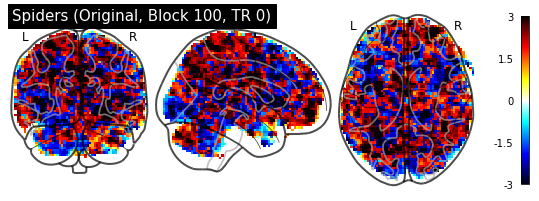

10/07/2020 16:20:55 Reconstruction Error (Frobenius Norm): 1.57890961e+02 out of 1.36356702e+03


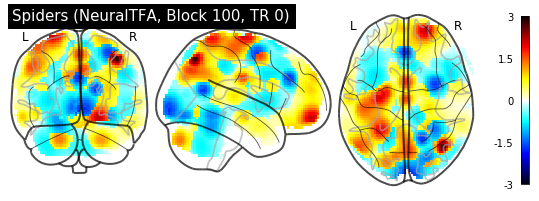

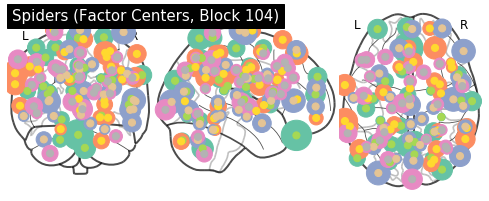

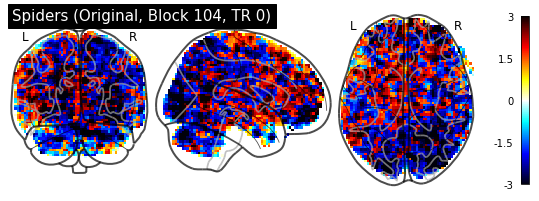

10/07/2020 16:21:00 Reconstruction Error (Frobenius Norm): 1.59776169e+02 out of 1.29743677e+03


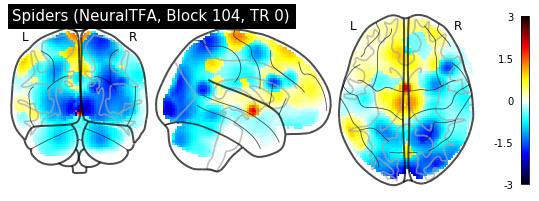

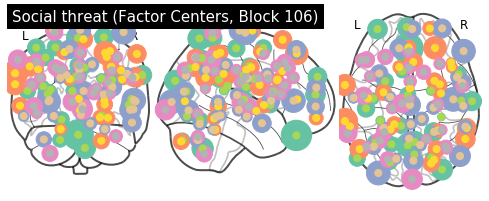

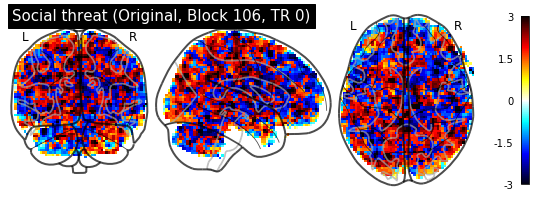

10/07/2020 16:21:04 Reconstruction Error (Frobenius Norm): 1.22153603e+02 out of 1.29308374e+03


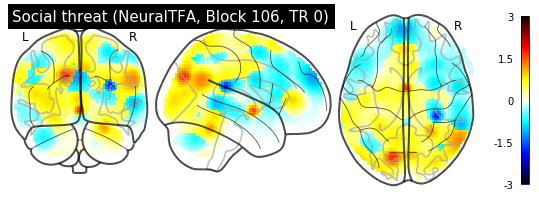

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

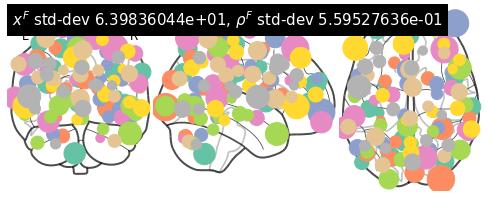

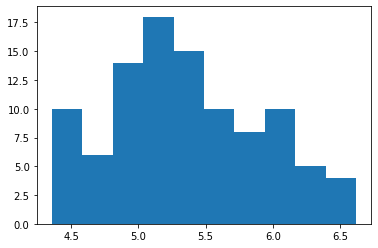

(<nilearn.plotting.displays.OrthoProjector at 0x7efebe7d8a50>,
 tensor([[-3.1989e+01, -2.9733e+01,  2.4684e+01],
         [ 6.5053e+01, -2.3278e+01,  3.5353e+01],
         [ 3.9449e+01, -4.0359e+01,  1.0761e+01],
         [-1.2660e+00,  5.2068e+01,  3.3965e+00],
         [-2.6979e+01,  7.0026e-01,  4.1272e+01],
         [-2.0342e+01, -7.6135e+01,  6.0202e+01],
         [-5.7828e+00, -5.8476e+01, -5.0337e+01],
         [ 3.6502e+01, -8.0929e+01,  3.5011e+01],
         [-5.0651e+01, -8.1740e+01,  1.5170e+00],
         [ 4.6871e+01,  6.5450e+00,  2.8865e+00],
         [-4.2944e+01, -2.5363e+01,  6.5386e+01],
         [-3.4376e+01,  5.8412e+01,  2.3207e+01],
         [-1.8388e+00,  6.2548e+01,  2.7410e+01],
         [ 1.8891e+01,  6.5215e+00,  1.8614e+01],
         [-2.5419e+01, -6.9678e+01, -1.2370e+01],
         [-1.5205e+01, -6.0272e+01,  1.8015e+01],
         [-2.6148e+01,  3.6115e+00,  6.0531e+01],
         [ 3.2560e+01, -9.9500e+01, -1.0636e+00],
         [-3.0785e+01, -3.7757e+01,  

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

10/07/2020 16:21:44 Average reconstruction error (MSE): 9.09810926e-01
10/07/2020 16:21:44 Average data norm (Euclidean): 1.00760690e+00
10/07/2020 16:21:44 Percent average reconstruction error: 0.317090


(0.9098109261413755, 1.0076068956685986, 0.0031709019423639987)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

10/07/2020 16:22:22 Average reconstruction error (MSE): 1.17023111e+03 +/- 4.73596100e+01
10/07/2020 16:22:22 Average data norm (Euclidean): 1.29588641e+03 +/- 5.64196993e+01
10/07/2020 16:22:22 Percent average reconstruction error: 90.348362 +/- 2.46749214e+00


(array([1205.08422852, 1121.78027344, 1205.25366211, 1204.30981445,
        1175.26501465, 1223.05627441, 1130.94592285, 1197.31225586,
        1171.93225098, 1160.74841309, 1216.8125    , 1235.74865723,
        1139.22180176, 1200.92883301, 1207.19116211, 1147.68127441,
        1183.32946777, 1188.61022949, 1182.15576172, 1193.81665039,
        1182.3001709 , 1191.40026855, 1173.70935059, 1190.81530762,
        1185.34069824, 1230.82531738, 1152.15734863, 1236.7980957 ,
        1241.49987793, 1216.62670898, 1203.22753906, 1179.11096191,
        1161.94213867, 1166.64038086, 1166.77856445, 1193.25622559,
        1158.43603516, 1186.91101074, 1164.04943848, 1119.63391113,
        1174.95495605, 1265.96191406, 1165.9230957 , 1320.87768555,
        1159.67700195, 1264.26000977, 1303.86938477, 1161.19018555,
        1157.20422363, 1087.06640625, 1140.99853516, 1200.26977539,
        1160.09423828, 1265.9185791 , 1172.97119141, 1198.93237305,
        1167.25598145, 1139.01672363, 1140.01379

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

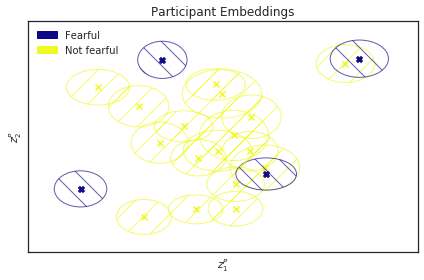

In [31]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

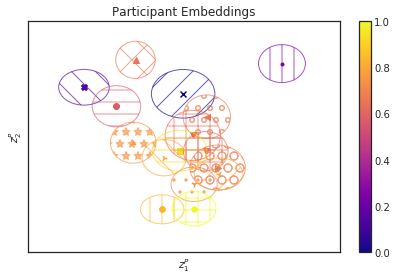

In [32]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

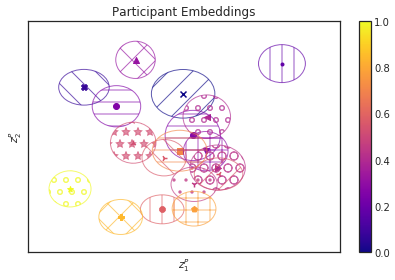

In [33]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

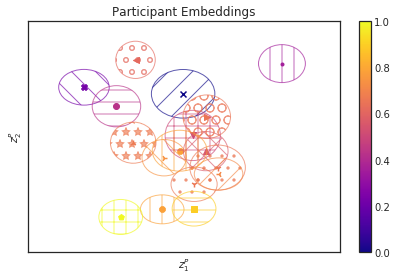

In [34]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

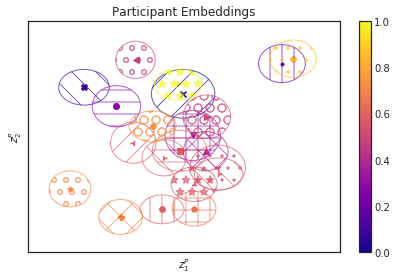

In [35]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')